In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline


Bad key savefig.frameon in file /Users/armandoordorica/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/armandoordorica/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/armandoordorica/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : s

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

In [3]:
df.head()

,Stationary,Nonstationary
0,0.041675,0.949658
1,-0.089264,0.429266
2,-0.814789,0.202321
3,0.828252,0.503022
4,-1.536092,0.733393


<AxesSubplot:>

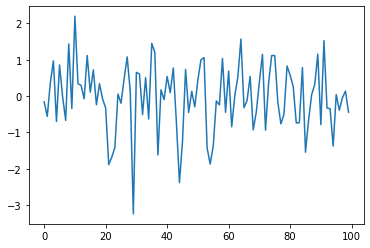

In [3]:
df.Stationary.plot()

<AxesSubplot:>

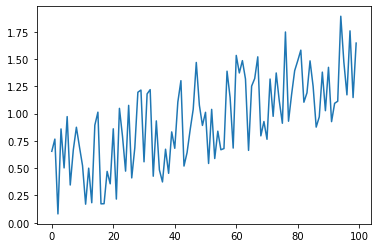

In [4]:
df.Nonstationary.plot()

In [5]:
df.Stationary

0    -0.158618
1    -0.560032
2     0.357852
3     0.967833
4    -0.698857
        ...   
95    0.042698
96   -0.388502
97   -0.048071
98    0.135383
99   -0.443877
Name: Stationary, Length: 100, dtype: float64

In [5]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

    
    

In [6]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
# Store the results of the test in the variable result
result = adfuller(df.Stationary)
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -8.665997
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.498198082189098)
('5%', -2.891208211860468)
('10%', -2.5825959973472097)


In [7]:
# Store the results of the test in the variable result
result = adfuller(df.Nonstationary)
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -0.985202
p-value:        0.758623 
Lags used:      8
Critical Values:
('1%', -3.50434289821397)
('5%', -2.8938659630479413)
('10%', -2.5840147047458037)


# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [8]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [9]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:>

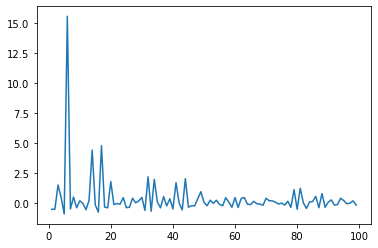

In [10]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff
**Difference in stock prices from one day to the next**

In [18]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [19]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:title={'center':'Diff'}>

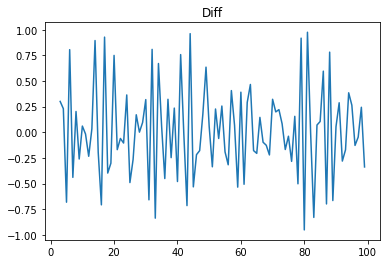

In [20]:
# Plot the 
df.Diff.plot(title=df.Diff.name)

In [21]:
df.head()

,Stationary,Nonstationary,Returns,Diff
3,0.828252,0.503022,1.486263,0.300702
4,-1.536092,0.733393,0.457974,0.230371
5,0.504359,0.051632,-0.929598,-0.681761
6,-0.157833,0.857125,15.600580,0.805492
7,1.030053,0.417392,-0.513032,-0.439733


ADF Statistic: -8.510654
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.5003788874873405)
('5%', -2.8921519665075235)
('10%', -2.5830997960069446)


True

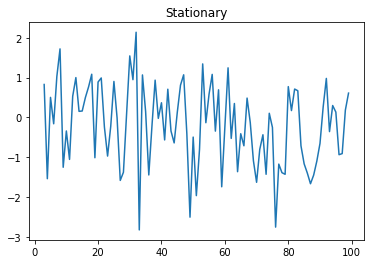

In [22]:
is_stationary(df.Stationary)

ADF Statistic: -1.370642
p-value:        0.596267 
Lags used:      8
Critical Values:
('1%', -3.506944401824286)
('5%', -2.894989819214876)
('10%', -2.584614550619835)


False

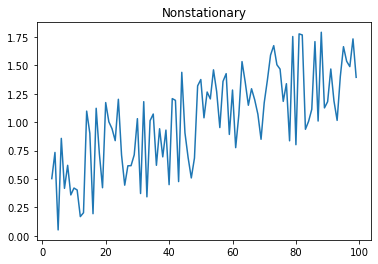

In [23]:
is_stationary(df.Nonstationary)

ADF Statistic: -3.896175
p-value:        0.002063 
Lags used:      11
Critical Values:
('1%', -3.5097356063504983)
('5%', -2.8961947486260944)
('10%', -2.5852576124567475)


True

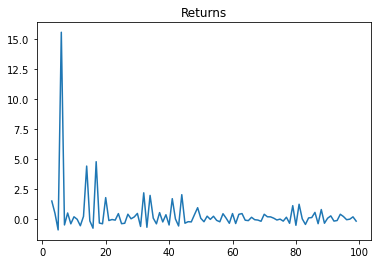

In [24]:
is_stationary(df.Returns)

ADF Statistic: -6.220862
p-value:        0.000000 
Lags used:      7
Critical Values:
('1%', -3.506057133647011)
('5%', -2.8946066061911946)
('10%', -2.5844100201994697)


True

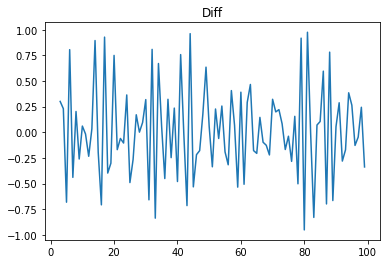

In [25]:
is_stationary(df.Diff)

### Another transformation we can do is to take the log of the diff

/Users/armandoordorica/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

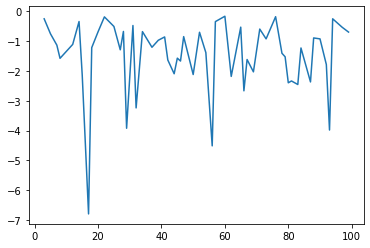

In [20]:
df2 = df[df['Diff'] != 0]
df2 = df2.replace(np.inf, np.nan).replace(-np.inf, np.nan)
df2 = df2.dropna()

df2['Log'] = np.log(df2['Diff'])
df2 = df2.dropna()
df2['Log'].plot()

ADF Statistic: -7.708240
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.560242358792829)
('5%', -2.9178502070837)
('10%', -2.5967964150943397)


True

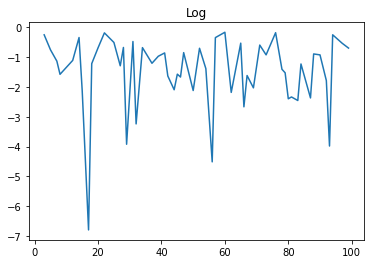

In [21]:
is_stationary(df2.Log)